In [2]:
from collections import namedtuple
# we need named tuples 

In [64]:
class Graph:
    def __init__(self, V, E):
        self.E = set(frozenset((u,v)) for u,v in E)
        self.V = V
        # beacuse the tuples inside the given list of edge can be unoredred
        self.adj_list = {}
        for v in V : # for every vertex in graph
            self.add_vertex(v)
        for u,v in self.E :
            self.adj_list[v].add(u) # now two by two iterate thorugh all of edges
            self.adj_list[u].add(v) # add eachother start and end to their neighbours 
            
    def degree(self, v):
        return(len(self.adj_list[v]))
    
    def neighbours(self,v):
        return self.adj_list[v]
    
    def add_vertex(self,v):
        if v not in self.adj_list:
            self.adj_list[v] = set()
    
    def add_edge(self, u,v):
        self.add_vertex(u)
        self.add_vertex(v)
        self.adj_list[u].add(v)
        self.adj_list[v].add(u)
        self.E.add(frozenset((u,v)))
    @property   
    def nv(self):
        return len(self.adj_list)
    @property
    def nm(self):
        return len(self.E)
    
    def remove_edge(self,u,v):
        e = frozenset((u,v))
        if e in self.E:
            self.E.remove(e)
            self.adj_list[u].remove(v)
            self.adj_list[v].remove(u)
    
    def remove_vertex(self, v):
        deleiting = list(self.adj_list[v])
        for u in deleiting:
            self.remove_edge(v,u)
        del self.adj_list[v]
        self.V.remove(v)

    def show_graph_withedges(self):
        import networkx as nx
        import matplotlib.pyplot as plt
        G = nx.Graph()
        G.add_nodes_from(self.V)
        G.add_edges_from(self.E)

        # Get the isolated nodes in the graph
        isolated_nodes = [node for node in G.nodes() if G.degree(node) == 0]

        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(5, 5))

        # Compute node positions for layout
        pos = nx.spring_layout(G)

        # Draw the graph with isolated nodes
        nx.draw_networkx(G, pos=pos, ax=ax, with_labels=True, node_color="firebrick")

        # Draw isolated nodes as separate blue circles
        nx.draw_networkx_nodes(G, pos=pos, ax=ax, nodelist=isolated_nodes, node_color="firebrick")

        # Display the graph
        plt.show()

    def show_graph_wiithadj(self):
        import networkx as nx
        import matplotlib.pyplot as plt
        G = nx.Graph()
        G.add_nodes_from(self.adj_list.keys())
        for node, neighbors in self.adj_list.items():
            G.add_edges_from((node, neighbor) for neighbor in neighbors)
        fig, ax = plt.subplots(figsize=(5, 5))
        nx.draw_networkx(G, with_labels=True, node_color="royalblue")
        plt.show()
    
if __name__== "__main__":
    G = Graph({1,2,3,4,5}, {(1,2),(2,3)})
    print(G.E)
    (G.add_vertex(4))
    G.add_edge(4,1)
    G.add_edge(4,2)
    print(G.nm)
    print(G.nv)
    print(G.E)
    print(G.adj_list)
    print(G.neighbours(3))
    # we use set beacuse they do not have occurance

{frozenset({2, 3}), frozenset({1, 2})}
4
5
{frozenset({2, 4}), frozenset({1, 4}), frozenset({2, 3}), frozenset({1, 2})}
{1: {2, 4}, 2: {1, 3, 4}, 3: {2}, 4: {1, 2}, 5: set()}
{2}


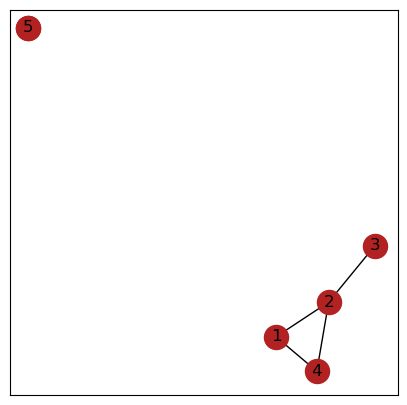

In [65]:
G.show_graph_withedges()

In [67]:
G.remove_edge(3,2)
print(G.E)
G.remove_vertex(4)
print(G.E)
print(G.adj_list)

{frozenset({2, 4}), frozenset({1, 4}), frozenset({1, 2})}
{frozenset({1, 2})}
{1: {2}, 2: {1}, 3: set(), 5: set()}


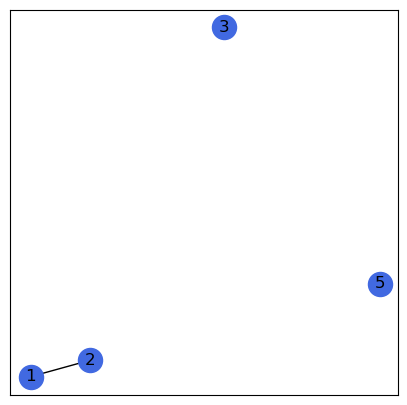

In [68]:
G.show_graph_wiithadj()